 # 베이지안 머신러닝

###  박태영 교수
### 연세대학교 응용통계학과

### Outline

### 2. 베이지안 갱신
    2.1 소표본하에서 베이지안 갱신
    2.2 대표본하에서 베이지안 갱신

#### 2.1 소표본하에서 베이지안 갱신

- 필요한 모듈을 설치

In [1]:
import numpy as np
from scipy.stats import beta, binom
import matplotlib.pyplot as plt

- 사전분포: `Beta(a,b)`
- 첫 번째 타석의 결과(`x1`) 이후 갱신된 사후분포: `Beta(a+x1, b+1-x1)`
- 두 번째 타석의 결과(`x2`) 이후 갱신된 사후분포: `Beta(a+x1+x2, b+2-x1-x2)`
- 세 번째 타석의 결과(`x3`) 이후 갱신된 사후분포: `Beta(a+x1+x2+x3, b+3-x1-x2-x3)`

In [2]:
x = np.array([0,0,1]) # 아웃, 아웃, 안타

- 데이터가 연속적으로 관찰되었을 때, 베이지안 갱신을 시각적으로 보여주는 함수 생성

In [3]:
def bayes_update(x,a,b):
    # (1) 그림의 틀 짜기, (1 x n)의 그림을 한 번에 표시하고 x축/y축을 공유 
    n = len(x)+1
    fig, axs = plt.subplots(1, n, sharex=True, sharey=True) 
    fig.set_figheight(4) # 그림의 높이
    fig.set_figwidth(4*len(x)) # 그림의 너비
        
    # (2) n번의 타석 중 x번 안타인 경우, 타율의 추청값 = x/n
    mle = sum(x)/len(x)
    
    # (3) 베이지안 갱신을 시각적으로 보여주는 그림 그리기  
    pt = np.linspace(0,1,100)
    
    for i in range(n):      
        if i==0:
            al = a
            be = b
        else:
            al = a+sum(x[:i])
            be = b+i-sum(x[:i])
        
        y = beta.pdf(pt,al,be)
        axs[i].plot(pt, y, 'r-') # 빨간색 실선
        axs[i].axvline(mle,linestyle='--',color='b') # 파란색 수직 파선
        axs[i].set_title('Beta($\\alpha$={}, $\\beta$={})'.format(al, be))
        axs[i].text(mle+0.03,0,str(round(mle,2)))        
        
    plt.show()

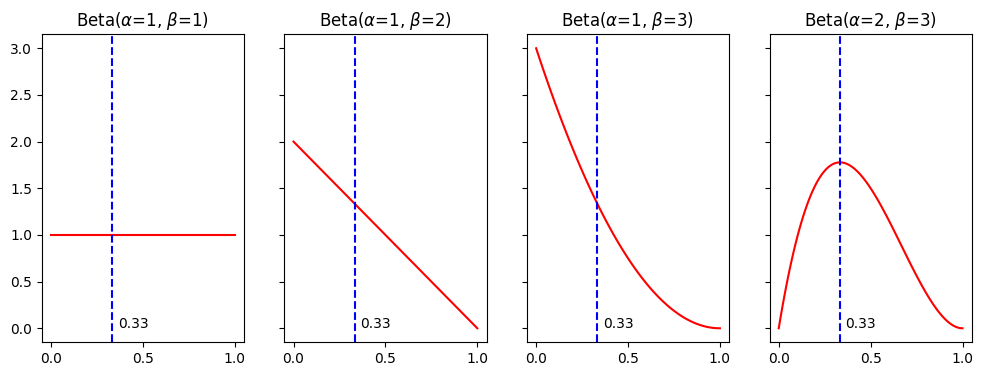

In [4]:
bayes_update(x,1,1) # alpha=1, beta=1

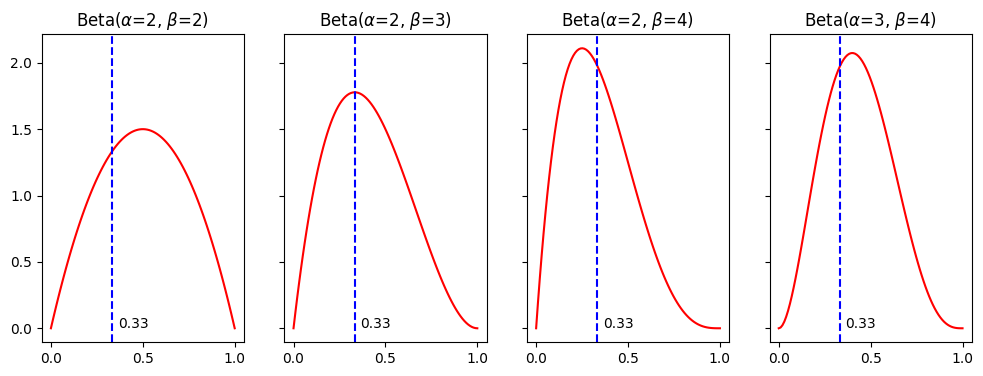

In [5]:
bayes_update(x,2,2) # alpha=2, beta=2

#### 2.2 대표본하에서 베이지안 갱신

- 사전분포의 선택과 상관없이 데이터가 축적될수록 사후분포는 비슷하게 수렴

In [6]:
n = 50
p = 0.3
x = binom.rvs(1, p, size=n)
x

array([1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 1, 0], dtype=int64)

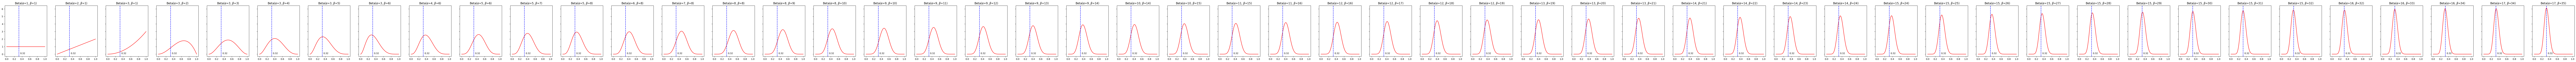

In [7]:
bayes_update(x,1,1) # alpha=1, beta=1

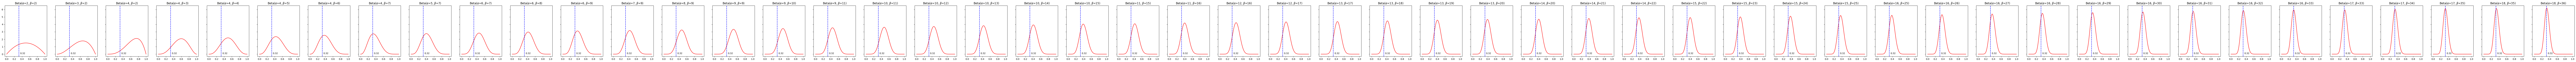

In [8]:
bayes_update(x,2,2) # alpha=1, beta=1